# Marketing Campaign Prediction using XGBoost & LightGBM

## Table of Content

  ###  1. What is XGBoost and LightGBM?
  ###  2. Importing Libraries
  ###  3. Loading Dataset
  ###  4. Data PreProcessing
  ###  5. EDA
  ###  6. Data Splitting
  ###  7. Model Selection and Training
  ###  8. Model Evaluation
  ###  9. LightGBM
  ### 10. Conclusion

## 1. What is XGBoost & LightGBM?

### XGBoost
    1. XGBoost (eXtreme Gradient Boosting) is a popular open-source gradient boosting framework that is widely used in machine learning and data mining for both regression and classification problems. XGBoost is a type of ensemble learning algorithm that combines the predictions of several weak learners (i.e., decision trees) to create a strong learner. 
    
    2. It works by iteratively training decision trees on the residual errors of the previous trees, with each new tree attempting to correct the errors of the previous ones. XGBoost uses a gradient descent algorithm to optimize the objective function, which is a combination of the loss function and a regularization term that helps prevent overfitting.
    
    3. XGBoost is known for its high performance, speed, and accuracy, and has been used to win several Kaggle competitions. It also has many advanced features such as early stopping, cross-validation, and the ability to handle missing values, which make it a powerful tool for machine learning practitioners.
    
    Gradient Boost has three main components.

    Loss Function: The role of the loss function is to estimate how best is the model in making predictions with the given data. This could vary depending on the type of the problem. 
    
    Weak Learner: Weak learner is one that classifies the data so poorly when compared to random guessing. The weak learners are mostly decision trees, but other models can be used in GBM.
    
    Additive Model: It is an iterative and sequential process in adding the decision trees one step at a time. Each iteration should reduce the value of loss function. A fixed number of trees are added, or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

### LightGBM

    1. LightGBM is an open-source gradient boosting framework that was developed by Microsoft and is designed to be efficient, scalable, and accurate for large-scale machine learning tasks. It is a faster and more memory-efficient implementation of gradient boosting than XGBoost and is specifically designed to work well with large datasets.
    
    Here are some key features and concepts of LightGBM:

    Gradient-based One-Side Sampling (GOSS): GOSS is a technique used in LightGBM to reduce the number of data instances used in each boosting iteration. It keeps a subset of data instances with large gradients and samples the rest of the instances with smaller gradients. This helps to speed up the training process while maintaining good accuracy.
    
    Exclusive Feature Bundling (EFB): EFB is another optimization technique used in LightGBM to handle high-cardinality categorical features. It bundles the categories in a feature into exclusive bins based on their interactions with the target variable. This reduces the memory consumption and improves the training speed.
    
    Leaf-wise Tree Growth: LightGBM uses a leaf-wise tree growth strategy instead of the traditional level-wise strategy. In leaf-wise growth, the algorithm chooses the leaf node that reduces the loss the most in each iteration. This approach can lead to a more complex tree structure and better accuracy, but it may also result in overfitting if not properly controlled.
    
    LightGBM Datasets: LightGBM introduces its own data structure called Dataset to efficiently handle and process large datasets. The Dataset can be constructed from various sources such as NumPy arrays, Pandas dataframes, or CSV files. It provides features like data partitioning, parallel data loading, and efficient memory storage.

    Parallel and GPU Learning: LightGBM supports parallel and GPU learning, which allows it to leverage multi-core processors and GPUs to speed up the training process. This is particularly beneficial when dealing with large-scale datasets.

    Regularization and Control Parameters: LightGBM provides various regularization techniques such as L1 and L2 regularization to prevent overfitting. It also offers control parameters to adjust the learning rate, tree depth, number of leaves, and other aspects of the boosting process.

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import openpyxl

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb

## 3. Loading Dataset

In [2]:
df = pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 4. Data Preprocessing

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# remove the null value from the features
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df['Income'].value_counts()

52247.251354    24
7500.000000     12
35860.000000     4
37760.000000     3
83844.000000     3
                ..
40760.000000     1
41452.000000     1
6835.000000      1
33622.000000     1
52869.000000     1
Name: Income, Length: 1975, dtype: int64

In [9]:
# # remove these two variables
# df = df.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 5. EDA

In [13]:
# fetch age from Year_Birth

df.Year_Birth = pd.to_datetime(df['Year_Birth'], format='%Y')
year_now = datetime.date.today().year
df['Age'] = df['Year_Birth'].apply(lambda x: year_now - x.year)
df.drop('Year_Birth',axis=1, inplace=True)

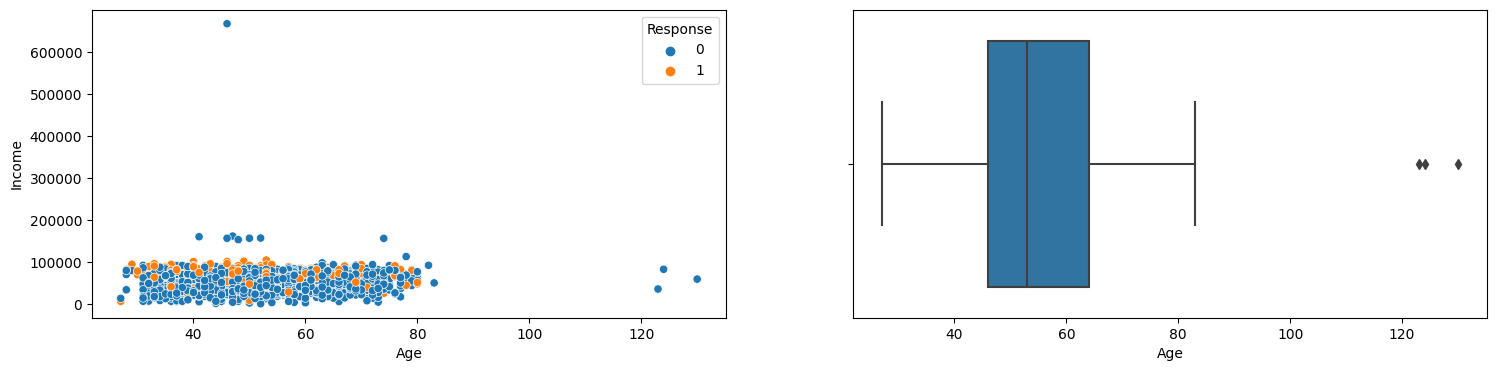

In [14]:
# Income spending by age
fig,ax = plt.subplots(1,2,figsize=(18,4))
sns.scatterplot(x='Age',y='Income',data=df, hue='Response',ax=ax[0])
sns.boxplot(x='Age',data=df,ax=ax[1])
plt.show()

    Seems there are few outliers in Age as well as Income
    Income for most of the population is under 100k
    Most of the people in the dataset aged between 45-65

In [15]:
# calculate customers spending
df['spending'] = df.MntFishProducts+df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines 

# dropping spending on each products
df.drop(['MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts','MntSweetProducts','MntWines'],axis=1, inplace=True)

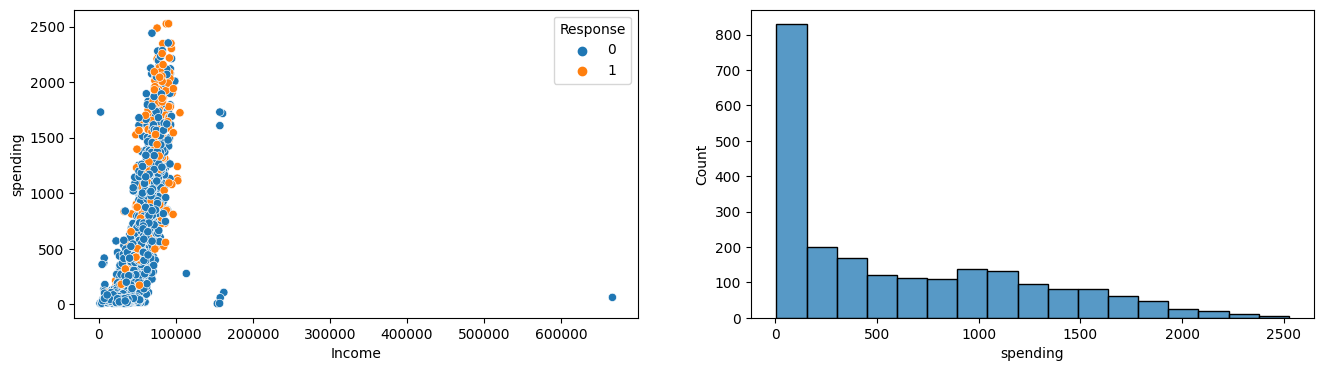

In [16]:
# Income and spending
fig,ax = plt.subplots(1,2,figsize=(16,4))
sns.scatterplot(x='Income',y='spending',data=df,hue='Response',ax=ax[0])
sns.histplot(df.spending,ax=ax[1])
plt.show()

    Most of the people who responded have high spending
    The number of people whose spending is less than 200 are high in numbers

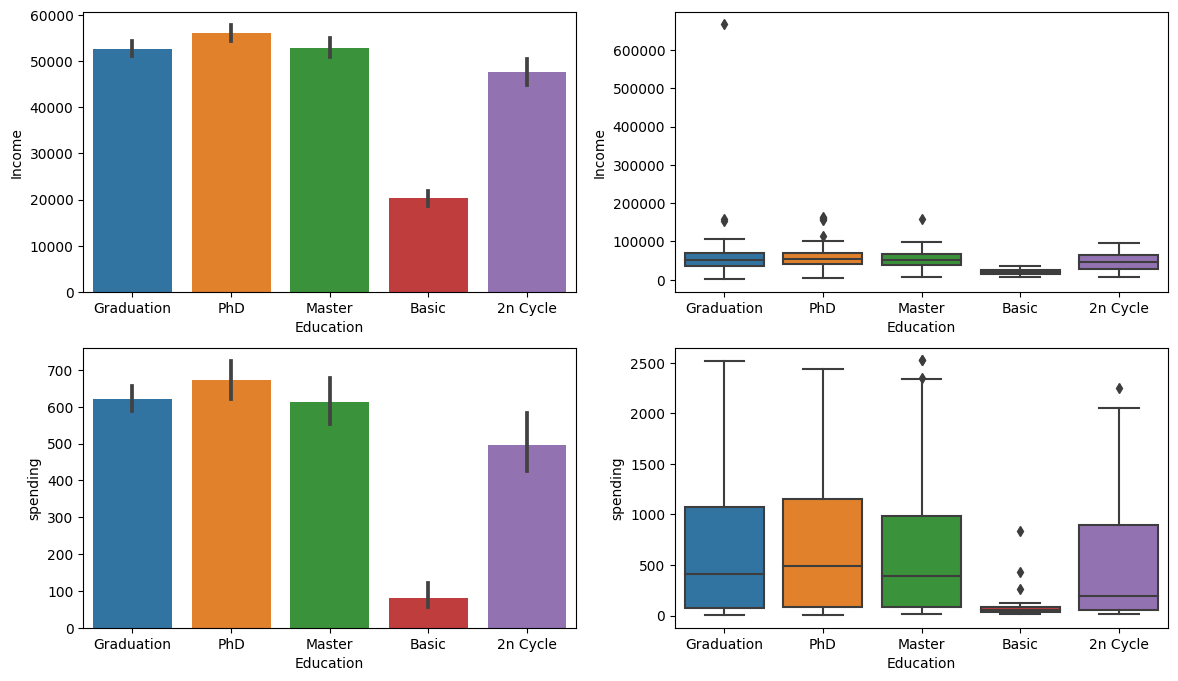

In [17]:
# Income and spending by education

fig,ax = plt.subplots(2,2,figsize=(14,8))
sns.barplot(x='Education',y='Income',data=df,ax=ax[0,0])
sns.boxplot(x='Education',y='Income',data=df,ax=ax[0,1])
sns.barplot(x='Education',y='spending',data=df,ax=ax[1,0])
sns.boxplot(x='Education',y='spending',data=df,ax=ax[1,1])
plt.show()

    Graduate spending is higher according to their income

In [18]:
# convert the date of enrolment to datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

# creating features from date of enrolment
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_customer'] = df['Dt_Customer'].apply(lambda x: x.day)

df = df.drop('Dt_Customer',axis=1)

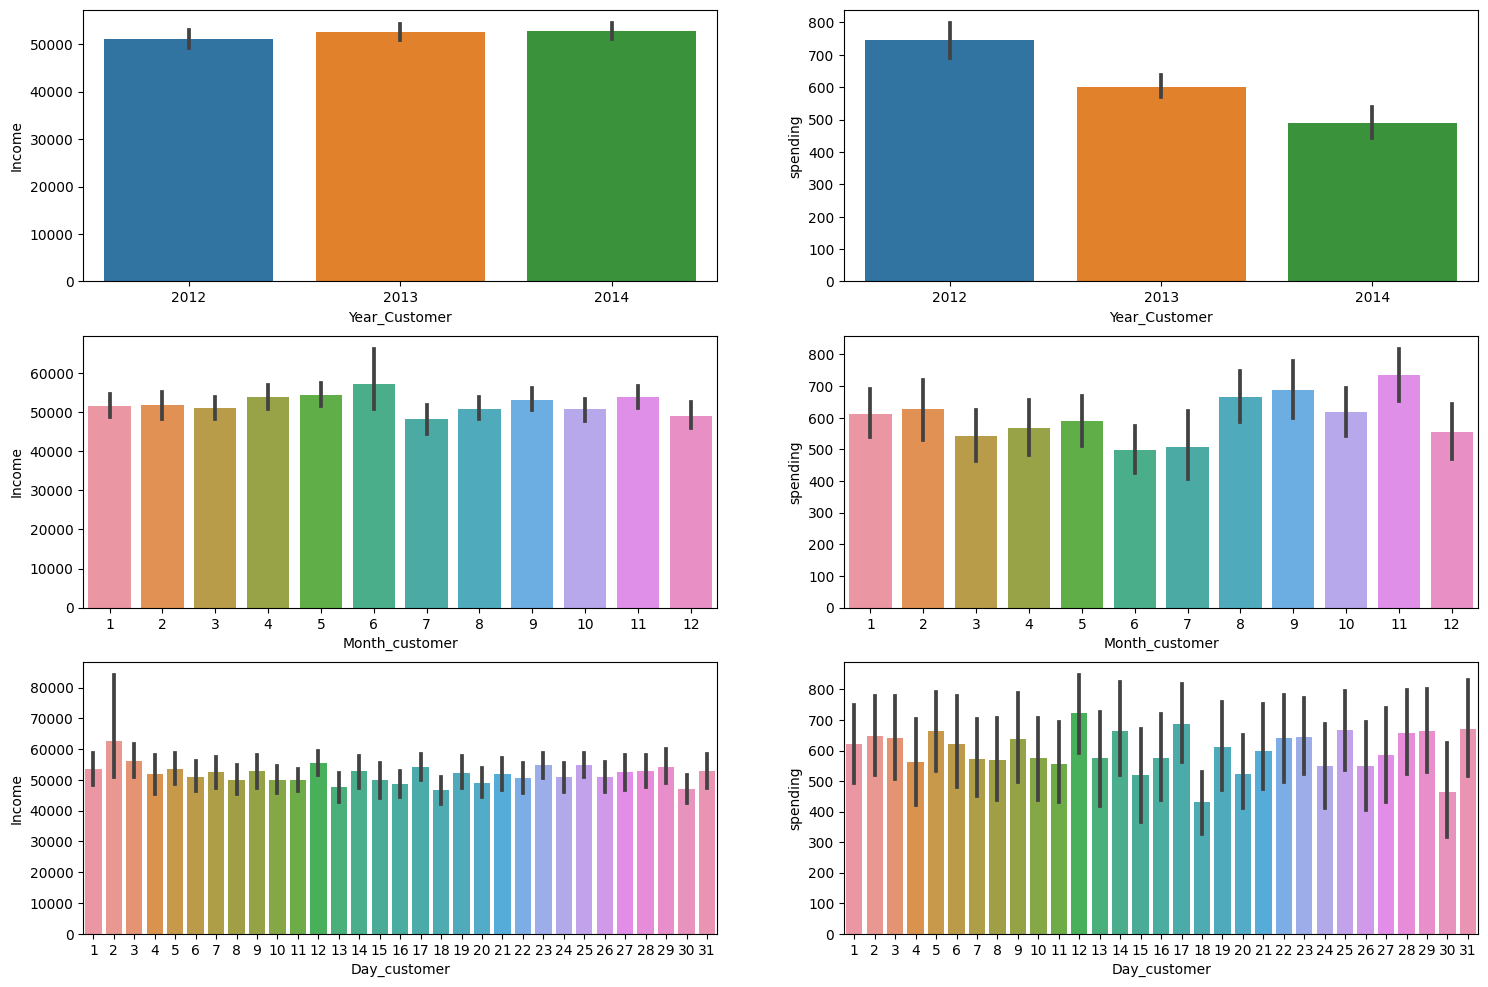

In [19]:
fig,ax = plt.subplots(3,2,figsize=(18,12))
sns.barplot(x='Year_Customer',y='Income',data=df,ax=ax[0,0])
sns.barplot(x='Year_Customer',y='spending',data=df,ax=ax[0,1])
sns.barplot(x='Month_customer',y='Income',data=df,ax=ax[1,0])
sns.barplot(x='Month_customer',y='spending',data=df,ax=ax[1,1])
sns.barplot(x='Day_customer',y='Income',data=df,ax=ax[2,0])
sns.barplot(x='Day_customer',y='spending',data=df,ax=ax[2,1])
plt.show()

    Year over year the income has increased however the spending has decreases

In [20]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'spending', 'Year_Customer', 'Month_customer', 'Day_customer'],
      dtype='object')

## Label Encoding

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

## 6. Data Splitting

In [22]:
x = df.drop('Response', axis=1)
y = df.Response

# shape of X and y
print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (2240, 25)
Shape of y:  (2240,)


## 7. Model Selection and Training

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(x, y, test_size =0.3, random_state=10)

In [24]:
print(X_train)

        ID  Education  Marital_Status        Income  Kidhome  Teenhome  \
808   2350          2               3  59666.000000        1         1   
1534  3745          0               3  23331.000000        1         0   
312   2437          2               3  52247.251354        0         0   
750   6974          4               5  83443.000000        0         0   
2167  3520          3               4  91172.000000        0         0   
...    ...        ...             ...           ...      ...       ...   
2009   832          4               5  65814.000000        0         1   
1180   359          2               5  48070.000000        0         1   
1344  5181          1               4  24367.000000        1         0   
527    713          3               3  50353.000000        0         0   
1289   378          2               3  52531.000000        0         0   

      Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  ...  \
808        87                  7

In [25]:
model = XGBClassifier()

In [26]:
model.fit(X_train._get_numeric_data(), Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
pred = model.predict(X_test._get_numeric_data())

## 8. Model Evaluation

In [28]:
print('Accuracy Score: ', accuracy_score(pred, Y_test)*100)

Accuracy Score:  88.54166666666666


In [29]:
print('Precision Score: ', precision_score(pred, Y_test)*100)

Precision Score:  46.808510638297875


In [30]:
print('F1 Score: ', f1_score(pred, Y_test)*100)

F1 Score:  53.33333333333332


In [31]:
print('Recall Score: ', recall_score(pred, Y_test)*100)

Recall Score:  61.97183098591549


In [32]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       578
           1       0.62      0.47      0.53        94

    accuracy                           0.89       672
   macro avg       0.77      0.71      0.73       672
weighted avg       0.88      0.89      0.88       672



## Confusion Matrix

In [33]:
cm = confusion_matrix(Y_test, pred)
cm

array([[551,  27],
       [ 50,  44]])

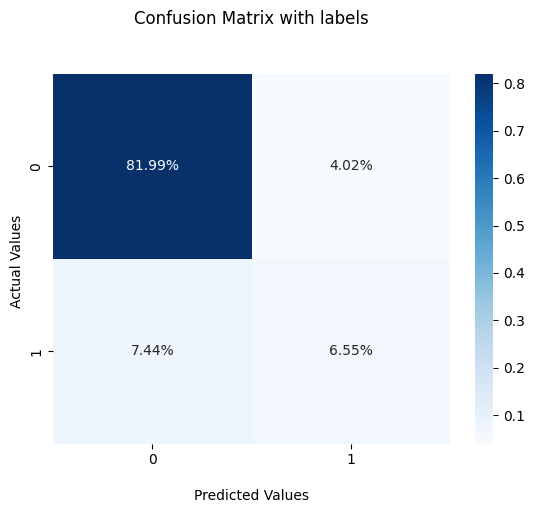

In [34]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## 9. LightGBM

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   NumDealsPurchases    2240 non-null   int64  
 8   NumWebPurchases      2240 non-null   int64  
 9   NumCatalogPurchases  2240 non-null   int64  
 10  NumStorePurchases    2240 non-null   int64  
 11  NumWebVisitsMonth    2240 non-null   int64  
 12  AcceptedCmp3         2240 non-null   int64  
 13  AcceptedCmp4         2240 non-null   int64  
 14  AcceptedCmp5         2240 non-null   int64  
 15  AcceptedCmp1         2240 non-null   i

In [36]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

LGBMClassifier()

In [40]:
lgb_acc = lgb_model.score(X_test,Y_test)
lgb_acc

0.8809523809523809

In [41]:
y_pred_lgb = model.predict(X_test)
print(y_pred_lgb)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 

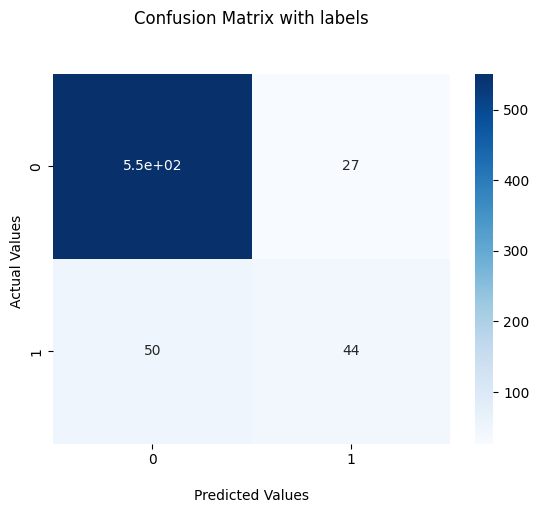

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_lgb)
cm

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## 10. Conclusion

In This Project, I build a Model of market campaign prediction using XGBoost algorithm and LightGBM algorithm to trained and evaluation the model. Overall, the use of XGBoost and LightGBM in a market campaign holds tremendous potential for organizations to gain a competitive edge, improve marketing effectiveness, and enhance customer experiences. And Evaluate the Accuracy of this model. Both accuracy score is almost same and Accuracy is 88%.